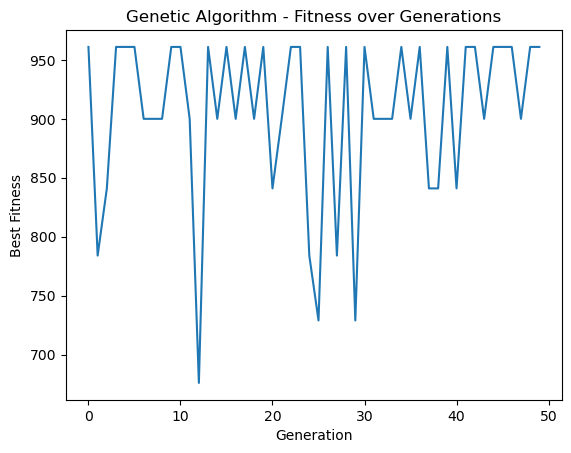

Individual: 28, Fitness: 784
Individual: 13, Fitness: 169
Individual: 30, Fitness: 900
Individual: 19, Fitness: 361
Individual: 18, Fitness: 324
Individual: 15, Fitness: 225
Individual: 22, Fitness: 484
Individual: 7, Fitness: 49
Individual: 30, Fitness: 900
Individual: 30, Fitness: 900


In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Objective function (maximize f(x) = x^2)
def fitness(x):
    return x**2

# Create a random individual (binary representation)
def create_individual():
    return random.randint(0, 31)

# Crossover between two parents to create offspring
def crossover(parent1, parent2):
    crossover_point = random.randint(1, 4)
    mask = (1 << crossover_point) - 1
    offspring1 = (parent1 & mask) | (parent2 & ~mask)
    offspring2 = (parent2 & mask) | (parent1 & ~mask)
    return offspring1, offspring2

# Mutation function
def mutate(individual):
    mutation_point = random.randint(0, 4)
    individual ^= (1 << mutation_point)
    return individual

# Tournament selection
def tournament_selection(population):
    selected = random.sample(population, 2)
    return max(selected, key=fitness)

# Main genetic algorithm function
def genetic_algorithm(generations=50, population_size=10):
    # Create initial population
    population = [create_individual() for _ in range(population_size)]

    best_fitness_over_time = []

    for generation in range(generations):
        # Evaluate fitness of the population
        population_fitness = [fitness(ind) for ind in population]

        # Track best fitness for this generation
        best_fitness_over_time.append(max(population_fitness))

        # Create the next generation
        new_population = []

        # Selection and reproduction
        for _ in range(population_size // 2):
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
            offspring1, offspring2 = crossover(parent1, parent2)

            # Mutation
            offspring1 = mutate(offspring1)
            offspring2 = mutate(offspring2)
            # Add offspring to the new population
            new_population.extend([offspring1, offspring2])

    # Replace the old population with the new population
        population = new_population

    # Return the best fitness over time and the final population
    return best_fitness_over_time, population

# Run the genetic algorithm
best_fitness_over_time, final_population = genetic_algorithm()

# Plot the results
plt.plot(best_fitness_over_time)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm - Fitness over Generations')
plt.show()

# Display the final population and their fitness values
final_fitness = [fitness(ind) for ind in final_population]
for ind, fit in zip(final_population, final_fitness):
    print(f"Individual: {ind}, Fitness: {fit}")
